<a href="https://colab.research.google.com/github/nipunharsh1/NEW-TEST/blob/main/Copy_of_notebook8abf5048a8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
%pip install kagglehub
import kagglehub
kritikseth_fruit_and_vegetable_image_recognition_path = kagglehub.dataset_download('kritikseth/fruit-and-vegetable-image-recognition')

print('Data source import complete.')



   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 1.98G/1.98G [38:39<00:00, 919kB/s]  


Extracting files...
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.19.0


In [ ]:
train_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'train'
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [ ]:
test_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'test'
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
val_dir = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'validation'
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [ ]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['cucumber' 'lettuce' 'jalepeno' 'paprika' 'banana' 'soy beans' 'eggplant'
 'lemon' 'raddish' 'mango' 'onion' 'garlic' 'potato' 'kiwi' 'spinach'
 'orange' 'pineapple' 'pomegranate' 'grapes' 'sweetcorn' 'pear'
 'cauliflower' 'capsicum' 'corn' 'beetroot' 'carrot' 'ginger'
 'chilli pepper' 'cabbage' 'peas' 'tomato' 'turnip' 'bell pepper'
 'watermelon' 'sweetpotato' 'apple']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/kaggle/input/fruit-and-vegetable-image-recogn...,cucumber
1,/kaggle/input/fruit-and-vegetable-image-recogn...,lettuce
2,/kaggle/input/fruit-and-vegetable-image-recogn...,jalepeno
3,/kaggle/input/fruit-and-vegetable-image-recogn...,paprika
4,/kaggle/input/fruit-and-vegetable-image-recogn...,banana


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


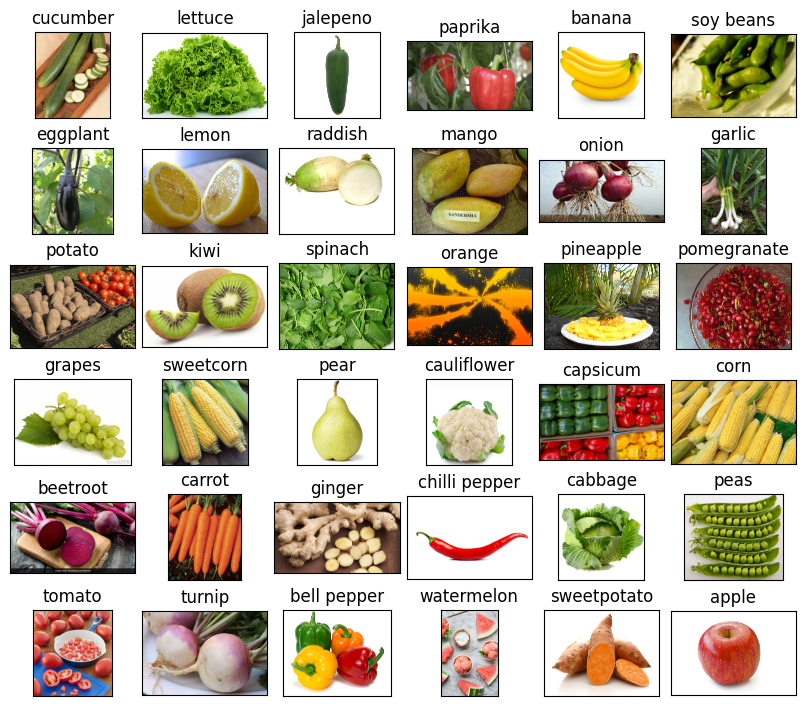

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

"""This code creates special tools called "data generators" for your images.

train_generator is for preparing images that will be used to train your model.
test_generator is for preparing images that will be used to test your model.
Both generators use a function (preprocess_input) that gets the images ready for a specific type of neural network (MobileNetV2) by adjusting their colors and values."""


'This code creates special tools called "data generators" for your images.\n\ntrain_generator is for preparing images that will be used to train your model.\ntest_generator is for preparing images that will be used to test your model.\nBoth generators use a function (preprocess_input) that gets the images ready for a specific type of neural network (MobileNetV2) by adjusting their colors and values.'

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False



> BELOW code builds and trains a neural network for classifying images of fruits and vegetables using TensorFlow and Keras. It starts by taking the input layer from a pre-trained model (likely MobileNet, given the filename), which allows you to leverage learned features from a large dataset. On top of the pre-trained model’s output, two fully connected (Dense) layers with 128 units each and ReLU activation are added. These layers help the model learn more complex patterns specific to your classification task.

The final Dense layer has 36 units with a softmax activation, which means the model will output probabilities for 36 different classes—presumably one for each fruit or vegetable type. The model is then constructed by specifying its inputs and outputs.

For training, the model is compiled with the Adam optimizer, categorical cross-entropy loss (suitable for multi-class classification), and accuracy as a metric to monitor. The fit function trains the model on your training images, validates on a separate set, and uses a batch size of 32 for 5 epochs. An EarlyStopping callback is included to halt training if the validation loss doesn’t improve for 2 consecutive epochs, and it restores the best weights found during training. This helps prevent overfitting and saves time by not training unnecessarily.






In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.3344 - loss: 2.6125 - val_accuracy: 0.8653 - val_loss: 0.4674
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.8117 - loss: 0.6084 - val_accuracy: 0.9132 - val_loss: 0.3085
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.8886 - loss: 0.3559 - val_accuracy: 0.9371 - val_loss: 0.2623
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9169 - loss: 0.2407 - val_accuracy: 0.9222 - val_loss: 0.2315
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9440 - loss: 0.1605 - val_accuracy: 0.9521 - val_loss: 0.1841


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


['bell pepper',
 'onion',
 'raddish',
 'lettuce',
 'sweetcorn',
 'sweetcorn',
 'potato',
 'onion',
 'cabbage',
 'sweetcorn',
 'pear',
 'onion',
 'pear',
 'kiwi',
 'lettuce',
 'mango',
 'capsicum',
 'lettuce',
 'jalepeno',
 'ginger',
 'pomegranate',
 'pear',
 'soy beans',
 'cabbage',
 'lemon',
 'pear',
 'cabbage',
 'turnip',
 'beetroot',
 'eggplant',
 'mango',
 'jalepeno',
 'raddish',
 'turnip',
 'mango',
 'onion',
 'cucumber',
 'pineapple',
 'eggplant',
 'grapes',
 'kiwi',
 'watermelon',
 'orange',
 'paprika',
 'corn',
 'chilli pepper',
 'lemon',
 'beetroot',
 'paprika',
 'mango',
 'jalepeno',
 'grapes',
 'carrot',
 'cucumber',
 'lemon',
 'lettuce',
 'paprika',
 'cabbage',
 'pomegranate',
 'jalepeno',
 'onion',
 'mango',
 'turnip',
 'raddish',
 'orange',
 'carrot',
 'cucumber',
 'sweetcorn',
 'turnip',
 'sweetpotato',
 'mango',
 'sweetcorn',
 'pear',
 'tomato',
 'watermelon',
 'spinach',
 'tomato',
 'banana',
 'garlic',
 'paprika',
 'bell pepper',
 'onion',
 'corn',
 'orange',
 'tomato

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
from pathlib import Path

img_path = Path(kritikseth_fruit_and_vegetable_image_recognition_path) / 'validation' / 'cabbage' / 'Image_7.jpg'
img = output(str(img_path))
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


'cabbage'

In [ ]:
model.save('FV.h5')

NameError: name 'model' is not defined